## A classification model using SVM for Salary Data
In this notebook, we will built a classification model using Support Vector Machines (SVM) to predict whether an individual's salary is above or below $50,000 based on various features such as age, occupation, and more. We will perform exploratory data analysis to gain insights into the data and preprocess it for modeling. Next, we will train an SVM model using the training data. We'll evaluate the model's performance on the testing data, fine-tune its hyperparameters and perform additional preprocessing to improve its accuracy. Overall, the goal of this notebook is to demonstrate how to build a classification model using SVM and how to optimize its performance. 

## Section 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Section 2. Load Train and Test Dataset

In [159]:
# TODO: Load the 'SalaryData_Train.csv' file into a pandas dataframe called train_data 
train_data = pd.read_csv('SalaryData_Train.csv')

# TODO: Load the 'SalaryData_Test.csv' file into a pandas dataframe called test_data 
test_data = pd.read_csv('SalaryData_Test.csv')

# TODO: Display the first 5 or 10 rows of the train_data dataframe
train_data[:6]
# train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Section 3. EDA

In [160]:
# TODO: Print the shape of the train_data dataframe
print('The shape of the train_data dataframe: ', train_data.shape)

# TODO: Print the shape of the test_data dataframe
print('The shape of the test_data dataframe: ', test_data.shape)
print('##----------------------------------------------------------------------------------')

# TODO: Print the information about the train_data dataframe
print('The information about the train_data dataframe:')
print(train_data.info)
print('##----------------------------------------------------------------------------------')

# TODO Display the summary statistics of the train_data dataframe 
print('The summary statistics of the train_data dataframe:')
print(train_data.describe)
print('##----------------------------------------------------------------------------------')

# TODO: Print the number of NaN values in each column of the train_data dataframe
print('The number of NaN values in each column of the train_data dataframe:')
print(train_data.isna().sum())
print('##----------------------------------------------------------------------------------')

# TODO: Replace any NaN values in the train_data dataframe with 0
train_data = train_data.fillna(value= 0)

The shape of the train_data dataframe:  (30161, 14)
The shape of the test_data dataframe:  (15060, 14)
##----------------------------------------------------------------------------------
The information about the train_data dataframe:
<bound method DataFrame.info of        age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58  

## Data Visualization

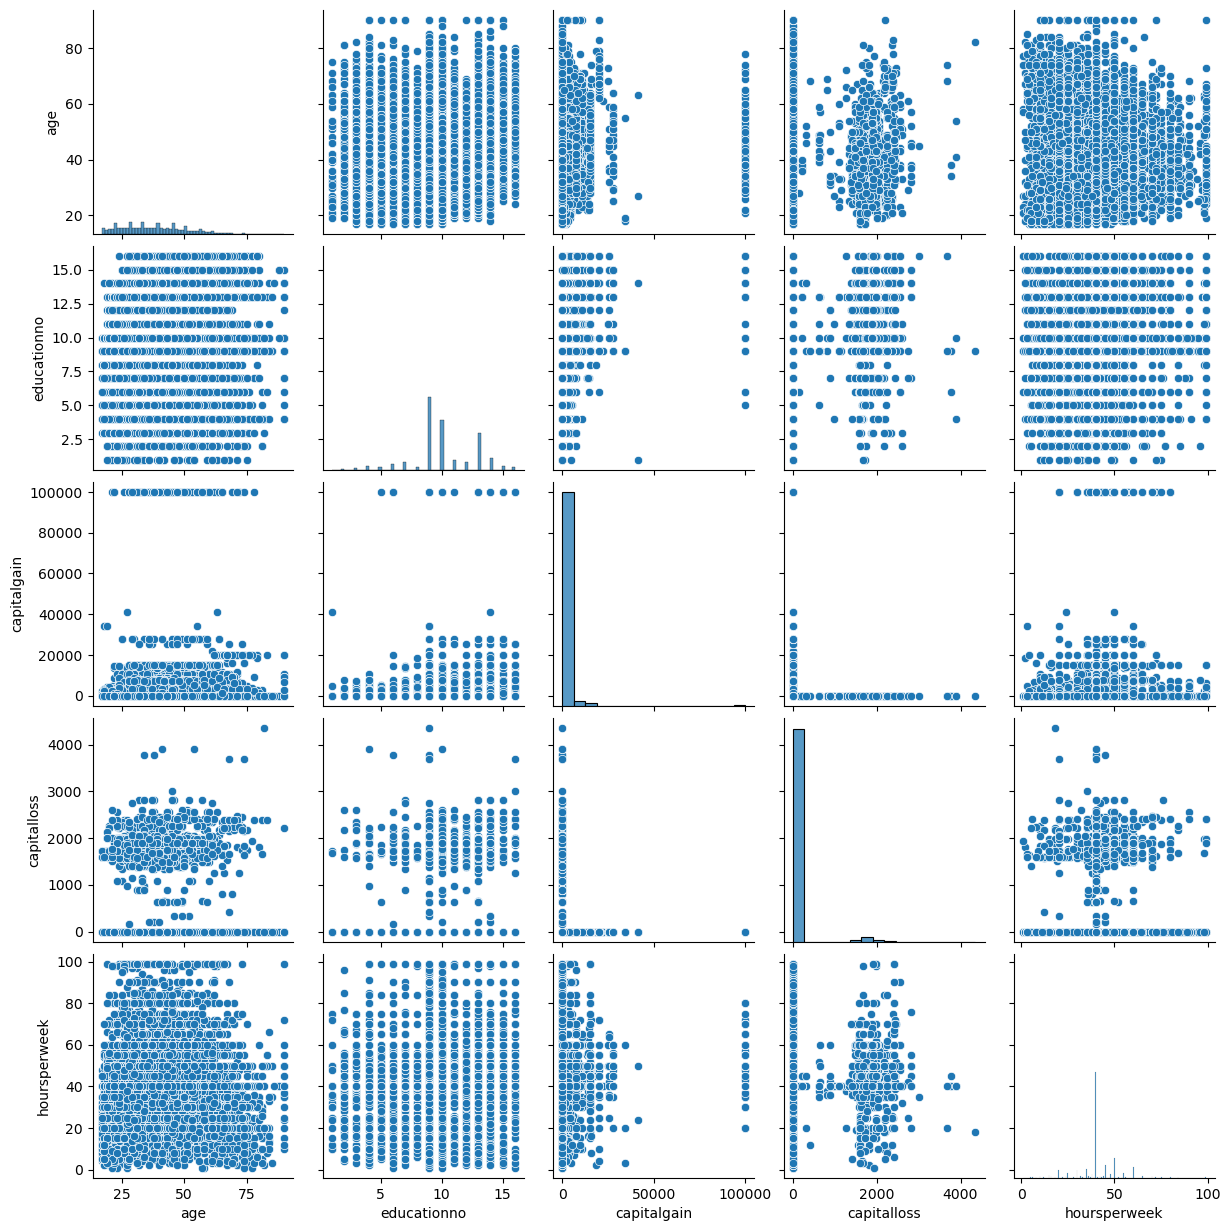

In [47]:
# TODO: Display pairwise relationships between variables in the train_data dataframe 
sns.pairplot(train_data)
plt.show()

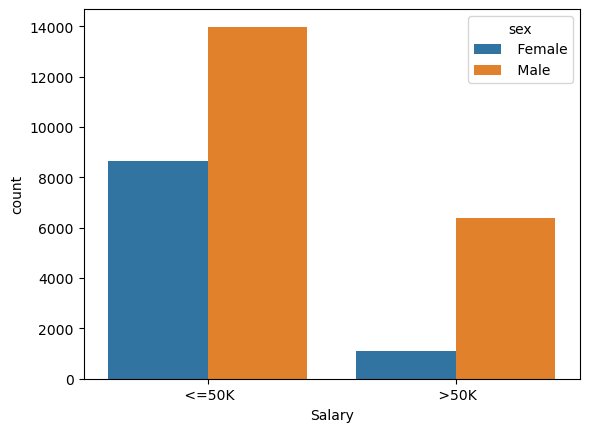

In [62]:
# TODO: Plot the average count of males and females in each salary group using a bar plot
sns.barplot(x='Salary', y='count', hue='sex', data=train_data.groupby(['Salary', 'sex']).size().reset_index(name='count'))
plt.show()

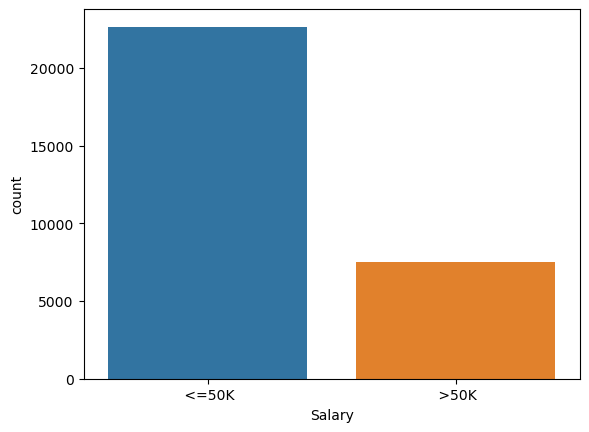

In [58]:
# TODO: Plot the count of each salary group in the train_data dataframe using a countplot
sns.countplot(data=train_data, x='Salary')
plt.show()

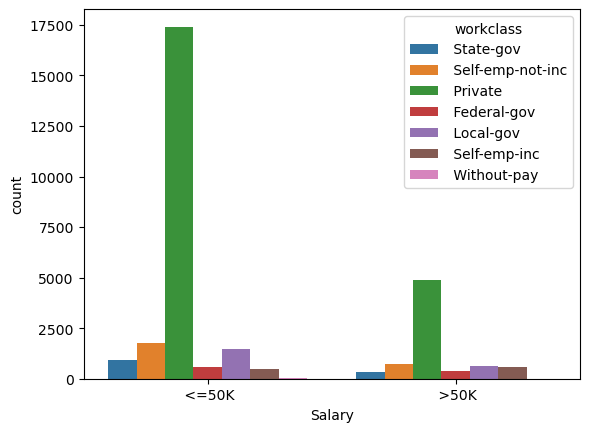

In [60]:
# TODO: Plot the count of each salary group in each workclass using a bar plot
sns.countplot(data= train_data, x= 'Salary', hue= 'workclass')
plt.show()

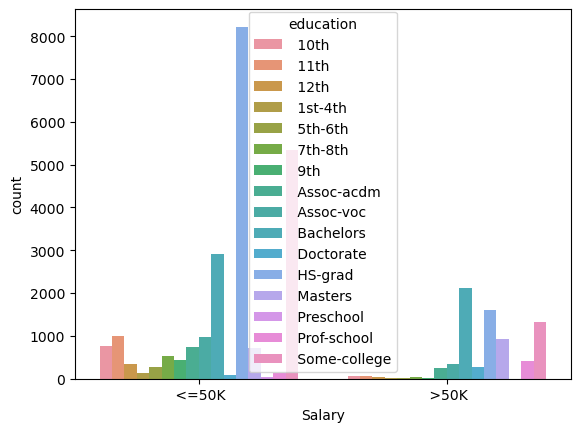

In [67]:
# TODO: Plot the average count of each education level in each salary group using a bar plot4
sns.barplot(x= 'Salary', y='count', hue='education', 
            data=train_data.groupby(['Salary', 'education']).size().reset_index(name='count'))
plt.show()

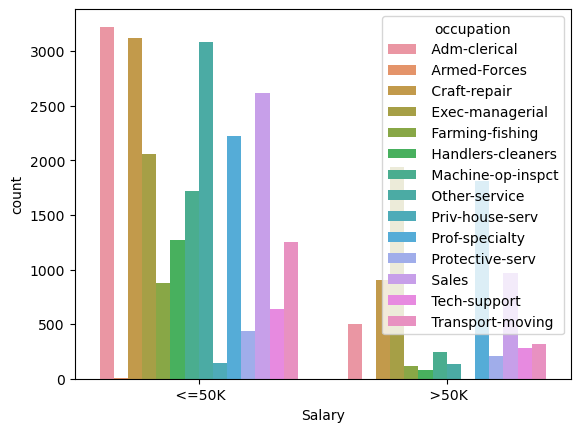

In [73]:
# TODO: Plot the average count of each occupation in each salary group using a bar plot
sns.barplot(x= 'Salary', y= 'count', hue= 'occupation', 
            data= train_data.groupby(['Salary', 'occupation']).size().reset_index(name='count'))
plt.show()

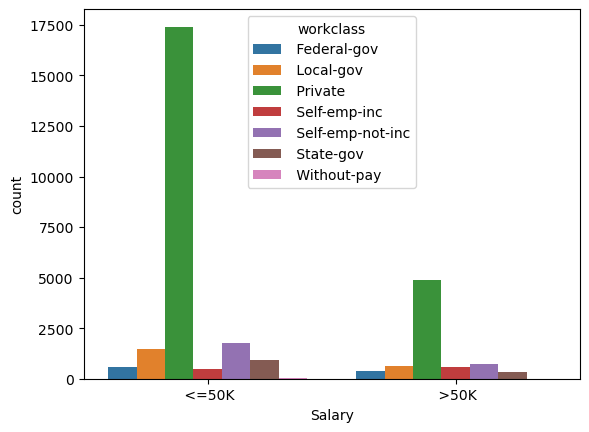

In [75]:
# TODO: Plot the average count of each workclass in each salary group using a bar plot
sns.barplot(x='Salary', y='count', hue='workclass', 
            data=train_data.groupby(['Salary', 'workclass']).size().reset_index(name='count'))
plt.show()

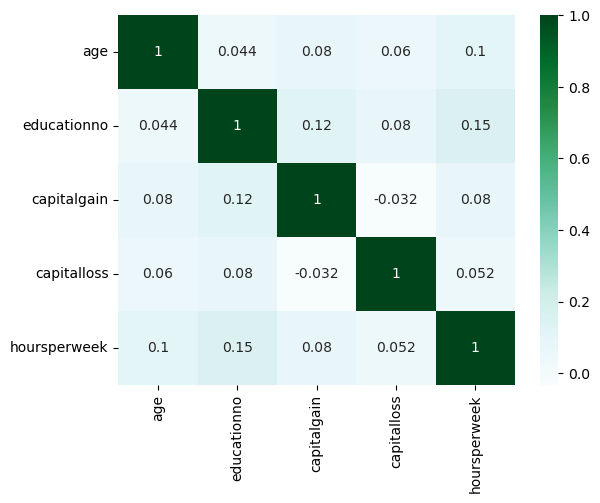

In [84]:
# TODO: Plot the correlation between variables in the train_data dataframe using a heatmap
sns.heatmap(train_data.corr(), annot=True, cmap='BuGn')
plt.show()

###  Outliers Detection

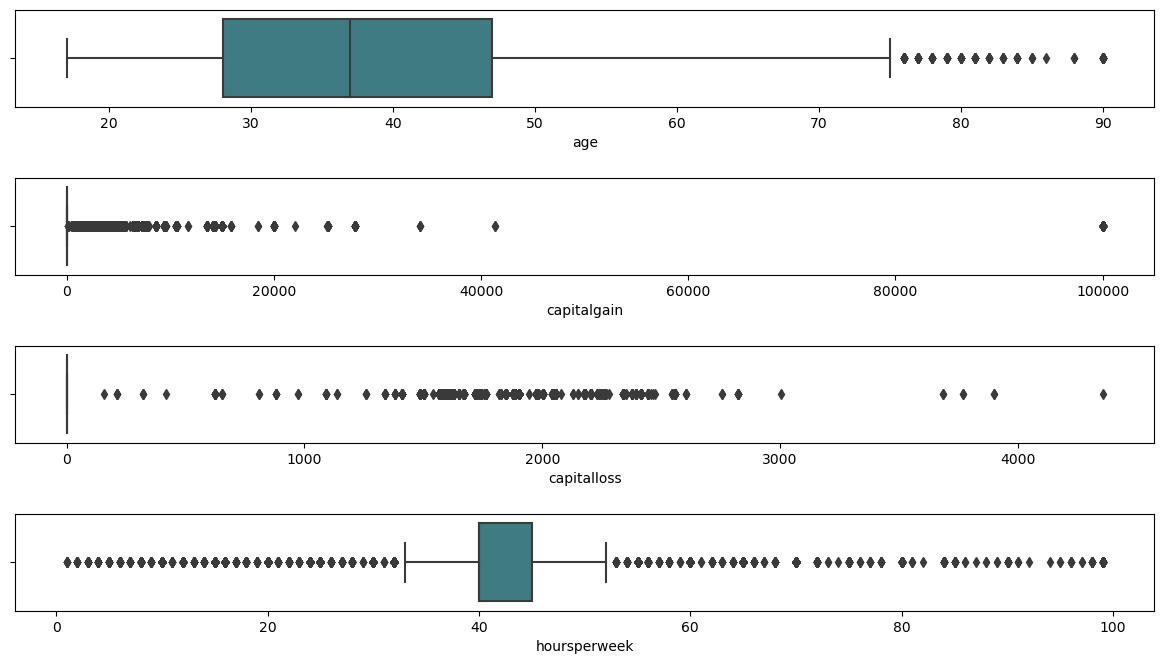

In [85]:
outlier1 = train_data.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier1,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier1,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier1,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier1,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

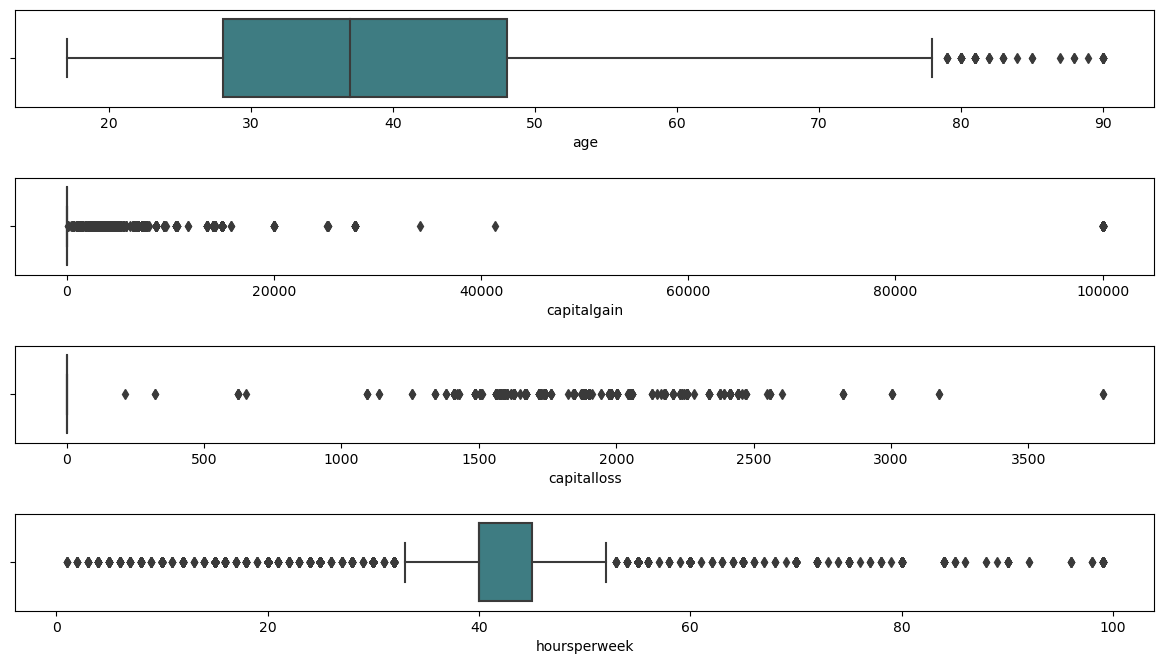

In [89]:
outlier2 = test_data.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier2,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier2,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier2,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier2,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

#### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

## Section 4. Data Preprocessing

- train_data

In [161]:
# TODO: Create a LabelEncoder object
le = LabelEncoder()

# TODO: Use the LabelEncoder object to transform these columns of the train_data dataframe:
# workclass, education, maritalstatus, occupation, relationship, race, sex, native
coloumns_to_encode = ['workclass', 'education', 'maritalstatus', 
                      'occupation', 'relationship', 'race', 'sex', 'native'] # Encode categorical variables
train_data[coloumns_to_encode] = train_data[coloumns_to_encode].apply(lambda x: le.fit_transform(x))

# TODO: Use a list comprehension to replace the values in the 'Salary' column of
#the train_data dataframe with 0 if the value is<=50K' and 1 if the value is '>50K'
train_data['Salary'] = [0 if value == ' <=50K' else 1 for value in train_data['Salary']]

# TODO: Display the modified train_data dataframe
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


- test_data

In [162]:
# Encode categorical variables
test_data[coloumns_to_encode] = test_data[coloumns_to_encode].apply(lambda x: le.fit_transform(x))
test = [value for value in test_data['Salary']]

test_data['Salary'] = [0 if value == ' <=50K' else 1 for value in test_data['Salary']]

# Display the modified test_data dataframe
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


## Section 5. Model Building

In [163]:
# TODO: Create X_train by dropping the 'Salary' column from the train_data dataframe
X_train = train_data.drop(columns= ['Salary'])

# TODO: Create y_train by selecting only the 'Salary' column from the train_data dataframe
y_train = train_data['Salary']

# TODO: Create X_test by dropping the 'Salary' column from the test_data dataframe
X_test = test_data.drop(columns= ['Salary'])

# TODO: Create y_test by selecting only the 'Salary' column from the test_data dataframe
y_test = test_data['Salary']

# TODO: Print the shape of X_train, y_train, X_test, and y_test dataframes
print('the shape of X_train:', X_train.shape)
print('the shape of y_train:', y_train.shape)
print('the shape of X_test:', X_test.shape)
print('the shape of y_test:', y_test.shape)

# TODO: Create a Support Vector Classifier object
svc_model = SVC()

the shape of X_train: (30161, 13)
the shape of y_train: (30161,)
the shape of X_test: (15060, 13)
the shape of y_test: (15060,)


## Section 6. Model Training | Testing | Evaluation - SVM Model

In [165]:
# TODO: Train the svc model with X_train and y_train 
svc_model.fit(X_train, y_train)

# TODO: Use the svc model to predict the values of y for X_test and store the result in y_pred
y_pred = svc_model.predict(X_test)

# TODO: Print the confusion matrix of y_test and y_pred
print('The confusion matrix of y_test and y_pred:')
print(confusion_matrix(y_test, y_pred))
print('##----------------------------------------------------------------------------------------------')

# TODO: Print the classification report of y_test and y_pred
print('The classification report of y_test and y_pred:')
print(classification_report(y_test, y_pred))
print('##----------------------------------------------------------------------------------------------')

# TODO: Print the training accuracy of the svc model with X_train and y_train 
training_accuracy = svc_model.score(X_train, y_train)
print('The training accuracy of the svc model with X_train and y_train: ', training_accuracy)
print('##----------------------------------------------------------------------------------------------')

# TODO: Print the testing accuracy of the svc model with X_test and y_test 
testing_accuracy = svc_model.score(X_test, y_test)
print('The testing accuracy of the svc model with X_test and y_test: ', testing_accuracy)
print('##----------------------------------------------------------------------------------------------')

The confusion matrix of y_test and y_pred:
[[10997   363]
 [ 2703   997]]
##----------------------------------------------------------------------------------------------
The classification report of y_test and y_pred:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060

##----------------------------------------------------------------------------------------------
The training accuracy of the svc model with X_train and y_train:  0.7960279831570571
##----------------------------------------------------------------------------------------------
The testing accuracy of the svc model with X_test and y_test:  0.7964143426294821
##-------------------------------------------------------------------------------------------

## Section 7. Handling Imbalance Data

In [169]:
# TODO: Print the count of each unique value in the 'Salary' column of the train_data dataframe
salary_counts = train_data['Salary'].value_counts()
print('The count of each unique value in the Salary column of the train_data dataframe:')
print(salary_counts)
print('##----------------------------------------------------------------------------------------------')

# TODO: Create a SMOTE object
smote = SMOTE()

# TODO: Use  the SMOTE object to resample the X_train and y_train dataframes
# and store the result in X_resampled and y_resampled, respectively
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# TODO: Display the resampled X_resampled dataframe
print('The resampled X_resampled dataframe:')
print(X_resampled[0:5])
print('##----------------------------------------------------------------------------------------------')

# TODO: Display the resampled y_resampled dataframe
print('The resampled y_resampled dataframe:')
print(y_resampled[0:5])
print('##----------------------------------------------------------------------------------------------')

# TODO: Print the count of each unique value in the resampled y_resampled dataframe
print('The count of each unique value in the resampled y_resampled dataframe:')
print(y_resampled.value_counts())

The count of each unique value in the Salary column of the train_data dataframe:
0    22653
1     7508
Name: Salary, dtype: int64
##----------------------------------------------------------------------------------------------
The resampled X_resampled dataframe:
   age  workclass  education  educationno  maritalstatus  occupation  \
0   39          5          9           13              4           0   
1   50          4          9           13              2           3   
2   38          2         11            9              0           5   
3   53          2          1            7              2           5   
4   28          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  
0             1     4    1         2174            0            40      37  
1             0     4    1            0            0            13      37  
2             1     4    1            0            0            40      

* 0.0001 < gamma < 10
* 0.1 < C < 100 -- gamma--decision boundary shape (Larger gamma value-overfitting of the model)
* C parameter adds a penalty for each misclassified data point

In [174]:
# TODO: Create a Support Vector Classifier object,
# try to change it's parameters for better accuracy
svc = SVC()

# TODO: Train the model with resampled X and y dataframes as arguments
svc.fit(X_resampled, y_resampled)

# TODO: Use the model to predict the values of y for X_test and store the result in y_pred
y_pred = svc.predict(X_test)

# TODO: Print the confusion matrix of y_test and y_pred
confusion_mat = confusion_matrix(y_test, y_pred)
print('The confusion matrix of y_test and y_pred:')
print(confusion_mat)
print('##----------------------------------------------------------------------------------------------')

# TODO: Print the classification report of y_test and y_pred
print('The classification report of y_test and y_pred:')
print(classification_report(y_test, y_pred))
print('##----------------------------------------------------------------------------------------------')

# TODO: Print the training accuracy of the model with resampled X and y dataframes as arguments
train_accuracy = svc.score(X_train, y_train)
print('The training accuracy of the model with resampled X and y dataframes as arguments:', train_accuracy)
print('##----------------------------------------------------------------------------------------------')

# TODO: Print the testing accuracy of the model with X_test and y_test as arguments
test_accuracy = svc.score(X_test, y_test)
print('the testing accuracy of the model with X_test and y_test as arguments:', test_accuracy)

The confusion matrix of y_test and y_pred:
[[10849   511]
 [ 2609  1091]]
##----------------------------------------------------------------------------------------------
The classification report of y_test and y_pred:
              precision    recall  f1-score   support

           0       0.81      0.96      0.87     11360
           1       0.68      0.29      0.41      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.62      0.64     15060
weighted avg       0.78      0.79      0.76     15060

##----------------------------------------------------------------------------------------------
The training accuracy of the model with resampled X and y dataframes as arguments: 0.7938065714001525
##----------------------------------------------------------------------------------------------
the testing accuracy of the model with X_test and y_test as arguments: 0.7928286852589641


## Section 8. Feature Selection

In [178]:
def select_features(X_train, y_train, X_test):

    # TODO: Create a SelectKBest object with chi2 as the score function
    selector = SelectKBest(score_func=chi2)
    
    # TODO: Fit the X_train and y_train dataframes using the SelectKBest object
    selector.fit(X_train, y_train)
    
    # TODO: Transform the X_train dataframe using the SelectKBest object and store the result in X_train_fs
    X_train_fs = selector.transform(X_train)
    
    # TODO: Transform the X_test dataframe using the SelectKBest object and store the result in X_test_fs
    X_test_fs = selector.transform(X_test)
    
    # TODO: Return the X_train_fs, X_test_fs, and SelectKBest object
    return X_train_fs, X_test_fs, selector


The corresponding score of each feature using scores_ attribute of the fs object:
[7.92714625e+03 4.06126126e+00 2.64815807e+02 2.17831744e+03
 9.82227659e+02 2.18597378e+02 3.43538273e+03 2.93395354e+01
 4.59219298e+02 7.41246624e+07 1.25878577e+06 5.56919407e+03
 1.67073200e+01]
##----------------------------------------------------------------------------------------------


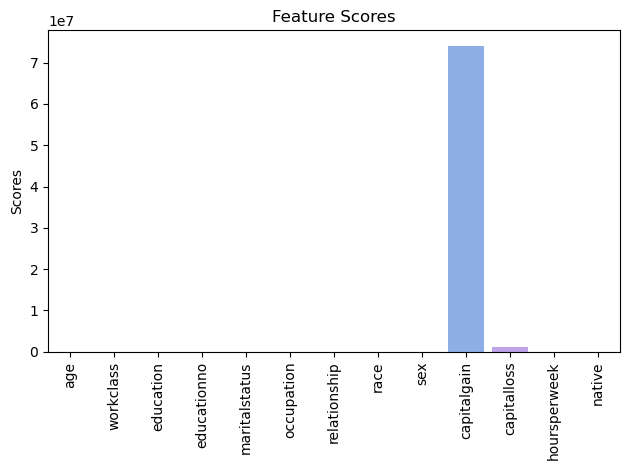

In [186]:
# TODO: Call the select_features() function and store the result in X_fs, X_test_fs, and fs
X_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# TODO: print the corresponding score of each feature using scores_ attribute of the fs object
fs_scores = fs.scores_
print('The corresponding score of each feature using scores_ attribute of the fs object:')
print(fs_scores)
print('##----------------------------------------------------------------------------------------------')

# TODO: Create a bar plot of the scores
keyList = train_data.columns.tolist()
keyList.remove('Salary')
sns.barplot(x= keyList, y= fs_scores)
plt.ylabel('Scores')
plt.title('Feature Scores')
plt.xticks(rotation=90)
plt.tight_layout()

# TODO: Display the bar plot 
plt.show()

# TODO Pick out the most relevant features
drop_list = ['workclass', 'native', 'race', 'sex', 'occupation', 'relationship']

In [187]:
# TODO: Create a copy of the train_data dataframe called train_data_copy 
train_data_copy = train_data

# TODO: Drop the columns with irrelevant features from the train_data_copy dataframe
train_data_copy = train_data_copy.drop(drop_list, axis = 1)

# TODO: Display the train_data_copy dataframe
print(train_data_copy[0:5])
print('##----------------------------------------------------------------------------------------------')

# TODO: Do the same to the test_data
test_data_copy = test_data
test_data_copy =test_data_copy.drop(drop_list, axis = 1)
print(test_data_copy[0:5])

   age  education  educationno  maritalstatus  capitalgain  capitalloss  \
0   39          9           13              4         2174            0   
1   50          9           13              2            0            0   
2   38         11            9              0            0            0   
3   53          1            7              2            0            0   
4   28          9           13              2            0            0   

   hoursperweek  Salary  
0            40       0  
1            13       0  
2            40       0  
3            40       0  
4            40       0  
##----------------------------------------------------------------------------------------------
   age  education  educationno  maritalstatus  capitalgain  capitalloss  \
0   25          1            7              4            0            0   
1   38         11            9              2            0            0   
2   28          7           12              2            0            0

## Section 9. Model Training with Highly Relevant Features


In [ ]:
# TODO: Repeat all the steps in Section 6 with the new dataset that has irrelevant features removed
## Ok,observe below:

In [182]:
# TODO: Train the svc model with X_train and y_train 
svc_model.fit(X_train, y_train)

# TODO: Use the svc model to predict the values of y for X_test and store the result in y_pred
y_pred = svc_model.predict(X_test)

# TODO: Print the confusion matrix of y_test and y_pred
print('The confusion matrix of y_test and y_pred:')
print(confusion_matrix(y_test, y_pred))
print('##----------------------------------------------------------------------------------------------')

# TODO: Print the classification report of y_test and y_pred
print('The classification report of y_test and y_pred:')
print(classification_report(y_test, y_pred))
print('##----------------------------------------------------------------------------------------------')

# TODO: Print the training accuracy of the svc model with X_train and y_train 
training_accuracy = svc_model.score(X_train, y_train)
print('The training accuracy of the svc model with X_train and y_train: ', training_accuracy)
print('##----------------------------------------------------------------------------------------------')

# TODO: Print the testing accuracy of the svc model with X_test and y_test 
testing_accuracy = svc_model.score(X_test, y_test)
print('The testing accuracy of the svc model with X_test and y_test: ', testing_accuracy)
print('##----------------------------------------------------------------------------------------------')

The confusion matrix of y_test and y_pred:
[[10997   363]
 [ 2703   997]]
##----------------------------------------------------------------------------------------------
The classification report of y_test and y_pred:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060

##----------------------------------------------------------------------------------------------
The training accuracy of the svc model with X_train and y_train:  0.7960279831570571
##----------------------------------------------------------------------------------------------
The testing accuracy of the svc model with X_test and y_test:  0.7964143426294821
##-------------------------------------------------------------------------------------------